In [54]:
# https://towardsdatascience.com/graph-algorithms-part-2-dce0b2734a1d
# https://bost.ocks.org/mike/hive/
%load_ext autoreload
%autoreload 2
import numpy as np
import json
import networkx as nx
import IPython.display
import PIL.Image
%matplotlib inline
import matplotlib.pyplot as plt
def showarray(a, fmt='png'):
    IPython.display.display(PIL.Image.fromarray(a))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
with open('Data/db.json') as json_file:
    js = json.load(json_file)
    
def saveJson(data):
    with open("Data/dbClean.json", 'w') as outfile:
        json.dump(data, outfile, sort_keys=True, indent=4)
        
def getGSKey(data, index):
    keys = list(data.keys())
    key  = keys[index]
    return key

def copyToData(fromDic, _data, _key):
    for key in fromDic:
        gsKey = getGSKey(_data, key)
        _data[gsKey][_key] = fromDic[key]
    saveJson(_data)

In [56]:
def cleanGraph(g, citeLimit, yearLimit):
    temp = {}
    for elem in g:
        if g[elem]["citation_count"] >= citeLimit and g[elem]["year"] >= yearLimit:
            temp[elem] = g[elem]
    
    for elem in temp:
        arr = [a for a in temp[elem]["related"] if a in temp]
        temp[elem]["related"] = arr
        
    print(len(g), len(temp))
    return temp

def cleanLinks(g):
    links = {}
    for elem in g:
        if elem not in links:
            links[elem] = {}
            arr = g[elem]["related"]
            for link in arr:
                if link != elem and link not in links:
                    c1 = g[elem]["citation_count"]
                    c2 = g[link]["citation_count"]
                    links[elem][link] = c1+c2
    for elem in g:
        if elem in links:
            g[elem]["related"] = links[elem]
        else:
            g[elem]["related"] = {}
    
    return links

def createAdjacenncyMatrix(data):
    keys = list(data.keys())
    adjacency = np.zeros(shape=(len(data), len(data)), dtype=np.uint8)

    for elem in data:
        rel = [keys.index(k) for k in data[elem]["related"]]
        adjacency[keys.index(elem), rel] = 1
#         for r in rel:
#             adjacency[r, keys.index(elem)] = 1
    return adjacency

def createGraph(matrix):
    return nx.from_numpy_matrix(adjacency)

In [67]:
data = cleanGraph(js, 50, 1990)
links = cleanLinks(data)

1063 682


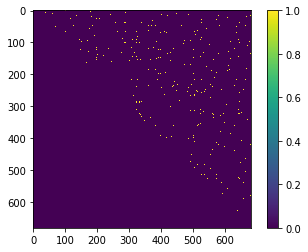

In [68]:
adjacency = createAdjacenncyMatrix(data)

plt.imshow(adjacency, interpolation='nearest')
plt.colorbar()
plt.show()

In [69]:
G = createGraph(adjacency)
G.edges(data=True)

# cc =sorted(nx.connected_components(G), key=len, reverse=True)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
Sc = [len(c) for c in nx.connected_components(G)]

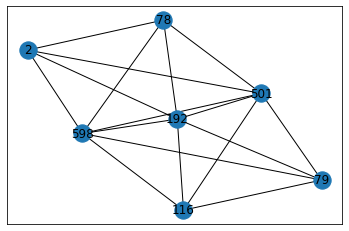

In [70]:
nx.draw_networkx(S[1])
plt.show()

In [71]:
# Compute PageRank
pgr = nx.pagerank(G, alpha=0.9)
copyToData(pgr, data, "info_page_rank")

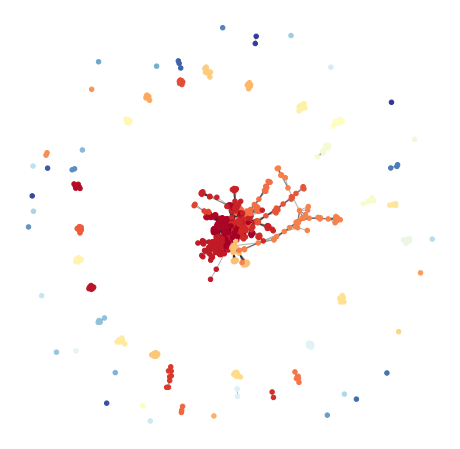

In [72]:
# Louvain Modularity
import community
partition = community.best_partition(G)
copyToData(partition, data, "info_louvain_modularity")

# Draw
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

Text(0.5, 1.0, 'Betweenness Centrality')

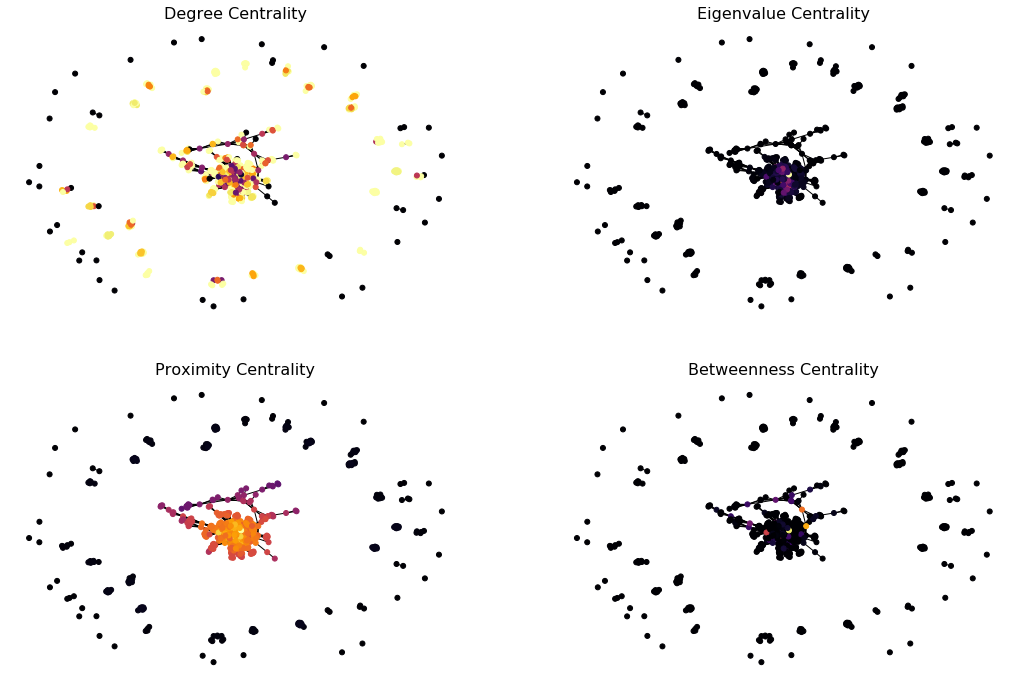

In [73]:
c_degree = nx.degree_centrality(G)
copyToData(c_degree, data, "info_degree_centrality")
c_degree = list(c_degree.values())

c_eigenvector = nx.eigenvector_centrality(G)
copyToData(c_eigenvector, data, "info_eigenvector_centrality")
c_eigenvector = list(c_eigenvector.values())

c_closeness = nx.closeness_centrality(G)
copyToData(c_closeness, data, "info_closeness_centrality")
c_closeness = list(c_closeness.values())

c_betweenness = nx.betweenness_centrality(G)
copyToData(c_betweenness, data, "info_betweenness_centrality")
c_betweenness = list(c_betweenness.values())

c_clustering = nx.clustering(G)
copyToData(c_clustering, data, "info_clustering")
c_clustering= list(c_clustering.values())

pos = nx.spring_layout(G)

# Plot the centrality of the nodes
plt.figure(figsize=(18, 12))
# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_clustering, node_size=25, pos=pos, with_labels=False)
axarr[0,0].set_title('Degree Centrality', size=16)
# Eigenvalue Centrality
plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=25, pos=pos, with_labels=False)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)
# Proximity Centrality
plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=25, pos=pos, with_labels=False)
axarr[1,0].set_title('Proximity Centrality', size=16)
# Betweenness Centrality
plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=25, pos=pos, with_labels=False)
axarr[1,1].set_title('Betweenness Centrality', size=16)


[ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

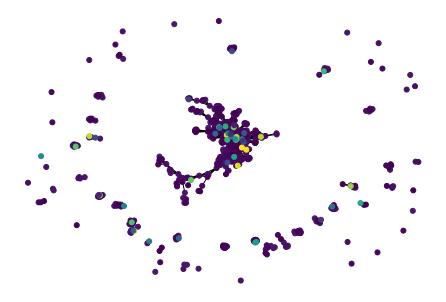

In [74]:
path_length=list(nx.all_pairs_shortest_path_length(G))
# print(path_length)
n = len(G)
distances=np.zeros((n,n))
# distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        try:
            distances[i][i] = pcc_longueurs[i][1][j]
        except:
            distances[i][i] = 50000

            
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=50,linkage='ward',affinity='euclidean').fit_predict(distances)

for idx, key in enumerate(clustering):
    gsKey = getGSKey(data, idx)
    data[gsKey]["info_agglomerative_clustering"] = clustering[idx].item()
saveJson(data)


nx.draw(G,  node_color = clustering, node_size=25)
print(clustering)


In [68]:
distances

array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])